In [1]:
import main
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time
import sklearn
import keras

Using TensorFlow backend.


# MNIST Using ANN Network

In [1]:
import main
import keras

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255
#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create model
model = main.ANN(
        network_sizes = [100,50],
        loss = 'categorical_crossentropy', 
        optimizer = 'adam',
        activation = 'relu',
        metrics = ['accuracy'],
        n_out = 10
        )    

#Train model
model.fit_model(
        x_train.reshape(-1,(28*28)).astype('float32'),
        y_train,
        batch_size = 400,
        epochs = 4,
        #validation_split = 0.01
        x_test = x_test.reshape(-1,(28*28)).astype('float32'),
        y_test = y_test, 
        )

#Evaluate model
model.eval(
        x_test.reshape(-1,(28*28)).astype('float32'),
        y_test
        )

Using TensorFlow backend.


Epoch 1/4
60000/60000 [==============================] - 2s 37us/step - loss: 0.4557 - acc: 0.8670
Epoch 2/4
60000/60000 [==============================] - 1s 20us/step - loss: 0.1542 - acc: 0.9550
Epoch 3/4
60000/60000 [==============================] - 1s 19us/step - loss: 0.1041 - acc: 0.9699
Epoch 4/4
60000/60000 [==============================] - 1s 20us/step - loss: 0.0766 - acc: 0.9772
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 1s 22us/step - loss: 0.0560 - acc: 0.9843 - val_loss: 0.0964 - val_acc: 0.9703
Epoch 2/4
60000/60000 [==============================] - 1s 21us/step - loss: 0.0435 - acc: 0.9876 - val_loss: 0.0949 - val_acc: 0.9709
Epoch 3/4
60000/60000 [==============================] - 1s 21us/step - loss: 0.0336 - acc: 0.9905 - val_loss: 0.0971 - val_acc: 0.9711
Epoch 4/4
10000/10000 [==============================] - 0s 29us/step


[0.09803042473483366, 0.9699]

Loss evolution


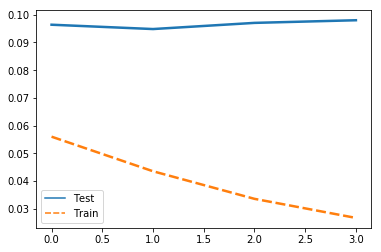

In [2]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


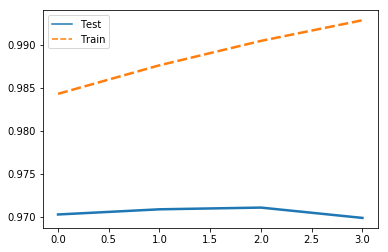

In [3]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


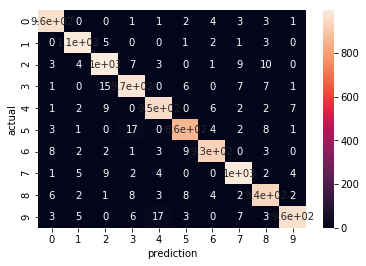

In [4]:
print('Model evalutaion')
model.plot_logits(x_test.reshape(-1,(28*28)),y_test)

# ANN on SIN wave

In [10]:
import main
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n = 500000

points = np.linspace(start = 0,stop = 1.5*n/20 * np.pi, num = n)

x = np.sin(points[:-25])

y = np.sin(points[25:])

X = x.reshape(-1,25)
Y = y[::25].reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(X, Y, shuffle = False,test_size = 0.2)

model = main.ANN(
    network_sizes = [30,15],
    activation='relu',
    dropout = 0.1,
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = None,
    n_out = 1
)

model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 200,
    epochs = 30,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

Train on 15999 samples, validate on 4000 samples
Epoch 1/30
15999/15999 [==============================] - 1s 78us/step - loss: 0.4136 - val_loss: 0.0422
Epoch 2/30
15999/15999 [==============================] - 0s 16us/step - loss: 0.0937 - val_loss: 0.0272
Epoch 3/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0567 - val_loss: 0.0162
Epoch 4/30
15999/15999 [==============================] - 0s 12us/step - loss: 0.0424 - val_loss: 0.0087
Epoch 5/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0323 - val_loss: 0.0057
Epoch 6/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0288 - val_loss: 0.0072
Epoch 7/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0254 - val_loss: 0.0035
Epoch 8/30
15999/15999 [==============================] - 0s 13us/step - loss: 0.0228 - val_loss: 0.0059
Epoch 9/30
15999/15999 [==============================] - 0s 12us/step - loss: 0.0209 - val_loss: 0.0033
Epoch 

Loss evolution


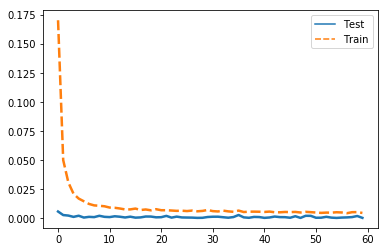

In [7]:
print('Loss evolution')
model.plot_loss()

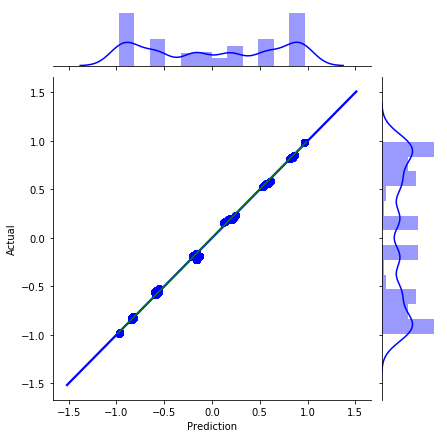

In [8]:
model.plot_scatter(x_test,y_test)

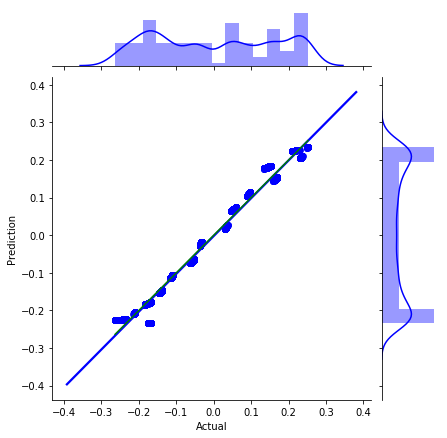

In [9]:
model.plot_scatter_var(x_test,y_test)

# MNIST Using CNN Network

In [1]:
import keras
import main

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255

#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = main.CNN(
        network_sizes = [50,25],
        filters = [5,5],
        kernels = [(4,4),(2,2)],
        pool_size = (2,2),
        activation='relu',
        dropout=0,
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
        n_out = 10
    )

model.fit_model(
        x_train = x_train.reshape(-1,28,28,1),
        y_train = y_train,
        batch_size = 200,
        epochs = 5,
        #validation_split = 0.01,
        x_test = x_test.reshape(-1,28,28,1),
        y_test = y_test, 
        verbose = 1
)

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 336us/step - loss: 0.3645 - acc: 0.9053 - val_loss: 0.1198 - val_acc: 0.9646
Epoch 2/5
60000/60000 [==============================] - 19s 323us/step - loss: 0.0927 - acc: 0.9738 - val_loss: 0.0844 - val_acc: 0.9739
Epoch 3/5
60000/60000 [==============================] - 19s 323us/step - loss: 0.0641 - acc: 0.9808 - val_loss: 0.0643 - val_acc: 0.9786
Epoch 4/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.0460 - acc: 0.9857 - val_loss: 0.0685 - val_acc: 0.9770
Epoch 5/5
60000/60000 [==============================] - 19s 320us/step - loss: 0.0384 - acc: 0.9881 - val_loss: 0.0608 - val_acc: 0.9791


Loss evolution


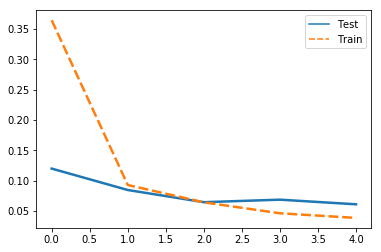

In [2]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


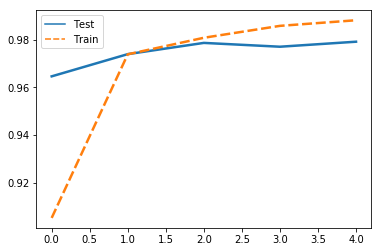

In [3]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


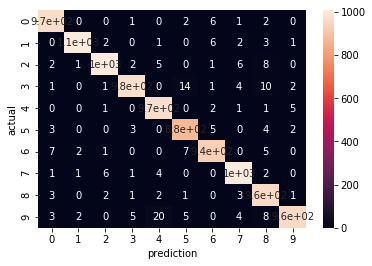

In [4]:
print('Model evalutaion')
model.plot_logits(x_test.reshape(-1,28,28,1),y_test)

# MNIST Using RNN Network

In [6]:
import main
import keras

#Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Rescale X
x_train /= 255
x_test /= 255

#Number of classes
num_classes = 10

#Convert to one hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = main.RNN(
    network_sizes = [30,15],
    lstm_cells = [28],
    activation='relu',
    rnn_type = 'GRU',
    dropout = 0.1,
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    n_out = 10
)

model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 200,
    epochs = 10,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,    
    verbose = 1
)



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 160us/step - loss: 1.7252 - acc: 0.3845 - val_loss: 1.0878 - val_acc: 0.6130
Epoch 2/10
60000/60000 [==============================] - 7s 124us/step - loss: 1.0049 - acc: 0.6308 - val_loss: 0.7401 - val_acc: 0.7312
Epoch 3/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.6897 - acc: 0.7509 - val_loss: 0.4932 - val_acc: 0.8149
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.5211 - acc: 0.8212 - val_loss: 0.3279 - val_acc: 0.8928
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.4086 - acc: 0.8694 - val_loss: 0.2471 - val_acc: 0.9248
Epoch 6/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3291 - acc: 0.8980 - val_loss: 0.1937 - val_acc: 0.9411
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2789 - acc: 0.9153 - val_loss: 0.1702 -

Loss evolution


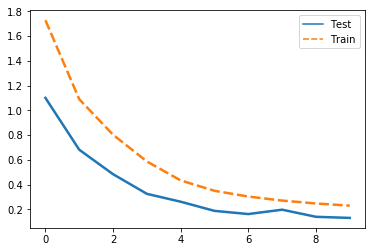

In [7]:
print('Loss evolution')
model.plot_loss()

Accuracy evolution


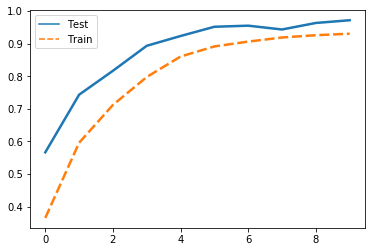

In [8]:
print('Accuracy evolution')
model.plot_acc()

Model evalutaion


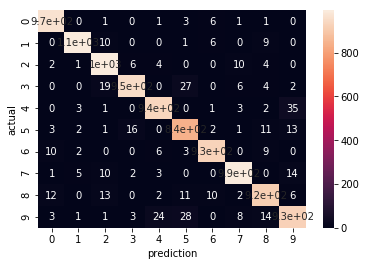

In [9]:
print('Model evalutaion')
model.plot_logits(x_test,y_test)

# RNN on SIN wave

In [9]:
import main
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n = 500000

points = np.linspace(start = 0,stop = 1.5*n/20 * np.pi, num = n)

x = np.sin(points[:-25])

y = np.sin(points[25:])

X = x.reshape(-1,25,1)
Y = y[::25].reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(X, Y, shuffle = False,test_size = 0.2)

model = main.RNN(
    network_sizes = [30,15],
    lstm_cells = [28],
    activation='relu',
    rnn_type = 'GRU',
    dropout = 0.1,
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = None,
    n_out = 1
)

model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 200,
    epochs = 30,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

Train on 15999 samples, validate on 4000 samples
Epoch 1/30
15999/15999 [==============================] - 3s 193us/step - loss: 0.3509 - val_loss: 0.0413
Epoch 2/30
15999/15999 [==============================] - 2s 94us/step - loss: 0.1363 - val_loss: 0.0534
Epoch 3/30
15999/15999 [==============================] - 2s 102us/step - loss: 0.1007 - val_loss: 0.0296
Epoch 4/30
15999/15999 [==============================] - 1s 90us/step - loss: 0.0859 - val_loss: 0.0232
Epoch 5/30
15999/15999 [==============================] - 1s 86us/step - loss: 0.0787 - val_loss: 0.0116
Epoch 6/30
15999/15999 [==============================] - 1s 89us/step - loss: 0.0746 - val_loss: 0.0095
Epoch 7/30
15999/15999 [==============================] - 1s 89us/step - loss: 0.0689 - val_loss: 0.0119
Epoch 8/30
15999/15999 [==============================] - 1s 86us/step - loss: 0.0685 - val_loss: 0.0126
Epoch 9/30
15999/15999 [==============================] - 1s 93us/step - loss: 0.0667 - val_loss: 0.0147
Epoc

Loss evolution


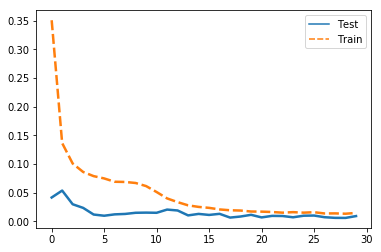

In [10]:
print('Loss evolution')
model.plot_loss()

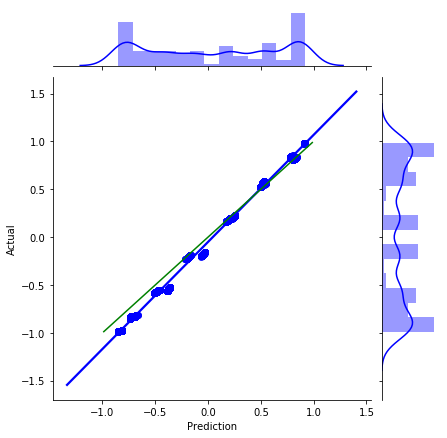

In [11]:
model.plot_scatter(x_test,y_test)

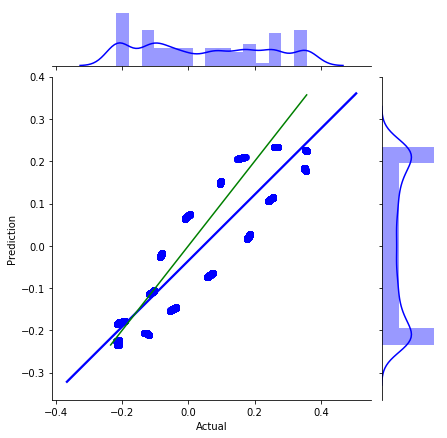

In [12]:
model.plot_scatter_var(x_test,y_test)

# Multistep RNN on SIN wave

In [9]:
import main
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n = 500000

points = np.linspace(start = 0,stop = 1.5*n/25 * np.pi, num = n)

x = np.sin(points[:-25])

y = np.sin(points[25:])

X = x.reshape(-1,25,1)
Y = y.reshape(-1,25,1)

x_train,x_test,y_train,y_test = train_test_split(X, Y, shuffle = False,test_size = 0.10)

model = main.RNN_multistep(
    network_sizes = [30,15],
    lstm_cells = [20,10],
    activation='tanh',
    rnn_type = 'lstm',
    dropout = 0.2,
    crop = (10,0),
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = None,
    n_out = 1  
)

model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 500,
    epochs = 30,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

pred = model.predict(x_test)

Train on 17999 samples, validate on 2000 samples
Epoch 1/30
17999/17999 [==============================] - 5s 274us/step - loss: 0.6097 - val_loss: 0.0527
Epoch 2/30
17999/17999 [==============================] - 2s 126us/step - loss: 0.2274 - val_loss: 0.0322
Epoch 3/30
17999/17999 [==============================] - 2s 125us/step - loss: 0.1659 - val_loss: 0.0212
Epoch 4/30
17999/17999 [==============================] - 3s 172us/step - loss: 0.1261 - val_loss: 0.0145
Epoch 5/30
17999/17999 [==============================] - 2s 132us/step - loss: 0.0956 - val_loss: 0.0125
Epoch 6/30
17999/17999 [==============================] - 2s 135us/step - loss: 0.0780 - val_loss: 0.0121
Epoch 7/30
17999/17999 [==============================] - 3s 164us/step - loss: 0.0675 - val_loss: 0.0116
Epoch 8/30
17999/17999 [==============================] - 3s 150us/step - loss: 0.0609 - val_loss: 0.0113
Epoch 9/30
17999/17999 [==============================] - 3s 141us/step - loss: 0.0551 - val_loss: 0.01

In [34]:
model.fit_model(
    x_train = x_train,
    y_train = y_train,
    batch_size = 500,
    epochs = 60,
    #validation_split = 0.01,
    x_test = x_test,
    y_test = y_test,
    verbose = 1
)

Train on 18999 samples, validate on 1000 samples
Epoch 1/60
18999/18999 [==============================] - 2s 89us/step - loss: 0.0020 - val_loss: 0.0066
Epoch 2/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0021 - val_loss: 0.0077
Epoch 3/60
18999/18999 [==============================] - 2s 85us/step - loss: 0.0019 - val_loss: 0.0062
Epoch 4/60
18999/18999 [==============================] - 2s 85us/step - loss: 0.0021 - val_loss: 0.0078
Epoch 5/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0021 - val_loss: 0.0077
Epoch 6/60
18999/18999 [==============================] - 2s 88us/step - loss: 0.0018 - val_loss: 0.0058
Epoch 7/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0021 - val_loss: 0.0074
Epoch 8/60
18999/18999 [==============================] - 2s 87us/step - loss: 0.0021 - val_loss: 0.0064
Epoch 9/60
18999/18999 [==============================] - 2s 86us/step - loss: 0.0018 - val_loss: 0.0071
Epoch 

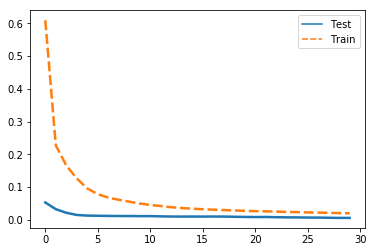

In [10]:
model.plot_loss()

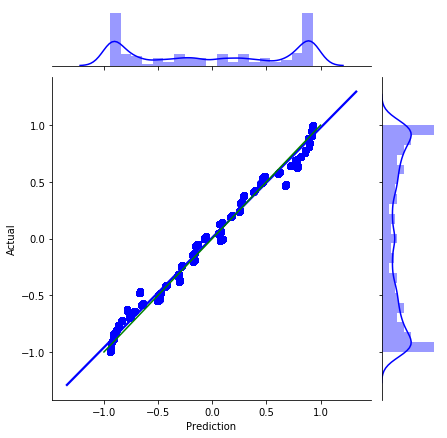

In [11]:
model.plot_scatter(x_test,y_test)

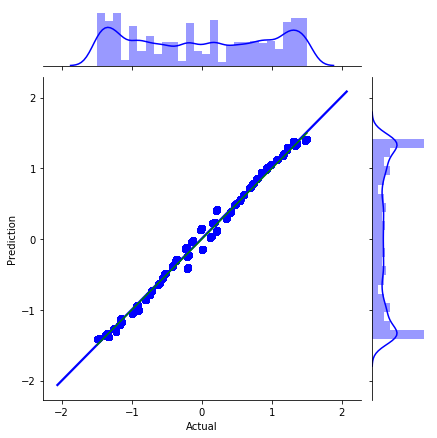

In [12]:
model.plot_scatter_var(x_test,y_test)

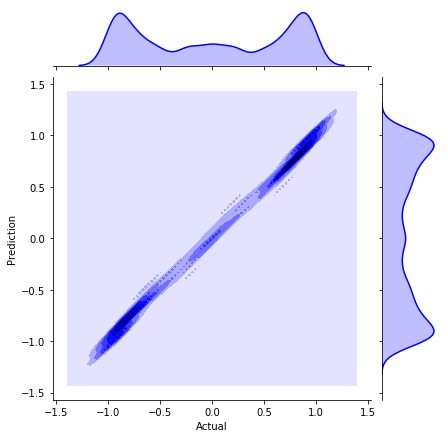

In [5]:
import seaborn as sns


sns.jointplot(x=pred.reshape(-1), y=y_test[:,10:].reshape(-1),
              kind='kde', color='b').set_axis_labels('Actual','Prediction')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x_test.reshape(-1),y_test.reshape(-1))

0.9919397307605031